In [1]:
import yfinance as yf

stock = "NFLX"
ticker = yf.Ticker(stock)
data = ticker.history(start="2013-01-01", end="2023-12-31", interval="1mo")["Close"]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy as sp

In [3]:
data.head()

Date
2013-01-01 00:00:00-05:00    23.605715
2013-02-01 00:00:00-05:00    26.868570
2013-03-01 00:00:00-05:00    27.040001
2013-04-01 00:00:00-04:00    30.867144
2013-05-01 00:00:00-04:00    32.321430
Name: Close, dtype: float64

In [4]:
stock = 'MXN=X'
ticker = yf.Ticker(stock)
usdmxn = ticker.history(start= '1993-01-01', end= '2023-12-31', interval='1mo')['Close']

usdmxn.head()

Date
2003-12-01 00:00:00+00:00    11.191
2004-01-01 00:00:00+00:00    11.048
2004-02-01 00:00:00+00:00    11.055
2004-03-01 00:00:00+00:00    11.105
2004-04-01 00:00:00+01:00    11.352
Name: Close, dtype: float64

In [5]:
data = data["2003":]

In [6]:
usdmxn = usdmxn["2004":]

In [7]:
usdmxn.index = usdmxn.index.strftime('%Y-%m')
usdmxn.index = pd.to_datetime(usdmxn.index)
usdmxn.head()

Date
2004-01-01    11.048
2004-02-01    11.055
2004-03-01    11.105
2004-04-01    11.352
2004-05-01    11.427
Name: Close, dtype: float64

In [8]:
data = pd.DataFrame(data.values, columns=['Y'], index=data.index)
data.head()

,Y
Date,
2013-01-01 00:00:00-05:00,23.605715
2013-02-01 00:00:00-05:00,26.868570
2013-03-01 00:00:00-05:00,27.040001
2013-04-01 00:00:00-04:00,30.867144
2013-05-01 00:00:00-04:00,32.321430


In [9]:
data.index = data.index.tz_localize(None)  # Remove time zone awareness
usdmxn.index = usdmxn.index.tz_localize(None)  # Remove time zone awareness

In [10]:
data = data.join(usdmxn)

In [11]:
data.head(24)

,Y,Close
Date,,
2013-01-01,23.605715,12.685200
2013-02-01,26.868570,12.782300
2013-03-01,27.040001,12.323300
2013-04-01,30.867144,12.134600
2013-05-01,32.321430,12.795700
2013-06-01,30.155714,12.972000
2013-07-01,34.925713,12.740000
2013-08-01,40.558571,13.386881
2013-09-01,44.172855,13.090040


In [12]:
getattr(data.index, 'month_name')

<bound method _inherit_from_data.<locals>.method of DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=132, freq=None)>

In [13]:
data['mes'] = data.index.month_name()

In [14]:
data

,Y,Close,mes
Date,,,
2013-01-01,23.605715,12.685200,January
2013-02-01,26.868570,12.782300,February
2013-03-01,27.040001,12.323300,March
2013-04-01,30.867144,12.134600,April
2013-05-01,32.321430,12.795700,May
...,...,...,...
2023-08-01,433.679993,16.757130,August
2023-09-01,377.600006,17.403900,September
2023-10-01,411.690002,18.048100,October


In [15]:
data = pd.get_dummies(data, columns=['mes'],
                      prefix="", prefix_sep="",
                      drop_first=True, dtype=float)

In [16]:
data

,Y,Close,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,,
2013-01-01,23.605715,12.685200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-01,26.868570,12.782300,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-03-01,27.040001,12.323300,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2013-04-01,30.867144,12.134600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-05-01,32.321430,12.795700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,433.679993,16.757130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-09-01,377.600006,17.403900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2023-10-01,411.690002,18.048100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
fecha_2008 = pd.Series(data = [1],
                       index=pd.to_datetime(["2008-11-01"]),
                       name='2008_outlier')
fecha_2020 = pd.Series(data = [1],
                       index=pd.to_datetime(["2020-03-01"]),
                       name='2020_outlier')

In [18]:
fecha_2008

2008-11-01    1
Name: 2008_outlier, dtype: int64

In [19]:
data = data.join(fecha_2008).fillna(0)

In [20]:
data["2008":"2008"]

,Y,Close,August,December,February,January,July,June,March,May,November,October,September,2008_outlier
Date,,,,,,,,,,,,,,


In [21]:
data = data.join(fecha_2020).fillna(0)

In [22]:
data["2020":"2020"]

,Y,Close,August,December,February,January,July,June,March,May,November,October,September,2008_outlier,2020_outlier
Date,,,,,,,,,,,,,,,
2020-01-01,345.089996,18.780800,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,369.029999,19.605101,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,375.500000,23.833000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-04-01,419.850006,23.742001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-01,419.730011,22.152100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-06-01,455.040009,23.056570,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-01,488.880005,21.995399,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-01,529.559998,21.749901,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-01,500.029999,22.373501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
data.head(13)

,Y,Close,August,December,February,January,July,June,March,May,November,October,September,2008_outlier,2020_outlier
Date,,,,,,,,,,,,,,,
2013-01-01,23.605715,12.685200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-01,26.868570,12.782300,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-03-01,27.040001,12.323300,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-04-01,30.867144,12.134600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-05-01,32.321430,12.795700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2013-06-01,30.155714,12.972000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-01,34.925713,12.740000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-08-01,40.558571,13.386881,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-09-01,44.172855,13.090040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
data = data["2004":]

In [25]:
data.shape

(132, 15)

In [26]:
import statsmodels.api as sm

In [27]:
?sm.OLS

In [28]:
print(sm.OLS(data['Y'], data.drop(columns=['Y'])).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              33.32
Date:                Wed, 25 Sep 2024   Prob (F-statistic):                    1.58e-33
Time:                        20:30:44   Log-Likelihood:                         -842.31
No. Observations:                 132   AIC:                                      1711.
Df Residuals:                     119   BIC:                                      1748.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

C:\Users\pacol\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
LinearRegression().fit(data.drop(columns=['Y']),
                       data['Y']).score(data.drop(
                                        columns=['Y']),
                                        data['Y'])

0.5175352181751447

In [31]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).coef_

array([  44.91096073,   28.02461777,   28.56745994,   10.7973442 ,
          8.87969742,   30.15999551,   19.54567417,   23.49935131,
          9.47336824,   27.77435653,   26.60295606,   15.36460392,
          0.        , -147.33932821])

In [32]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).intercept_

-571.0229582818547

In [33]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).feature_names_in_

array(['Close', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September',
       '2008_outlier', '2020_outlier'], dtype=object)

In [34]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).n_features_in_

14

In [35]:
predict = LinearRegression().fit(data.drop(columns=['Y']),
                                data['Y']).predict(data.drop(
                                            columns=['Y']))

In [36]:
predict[:12]

array([  7.56124634,  13.83975899,   5.92765157, -26.04642839,
        13.11759339,  31.10770389,  31.30266658,  58.21934068,
        32.22792726,  40.10062139,  45.21970258,  42.61352611])

In [37]:
errors = LinearRegression().fit(data.drop(columns=['Y']),
                                data['Y']).predict(data.drop(
                                            columns=['Y'])) - data['Y']

In [38]:
errors.head()

Date
2013-01-01   -16.044468
2013-02-01   -13.028811
2013-03-01   -21.112349
2013-04-01   -56.913572
2013-05-01   -19.203837
Name: Y, dtype: float64

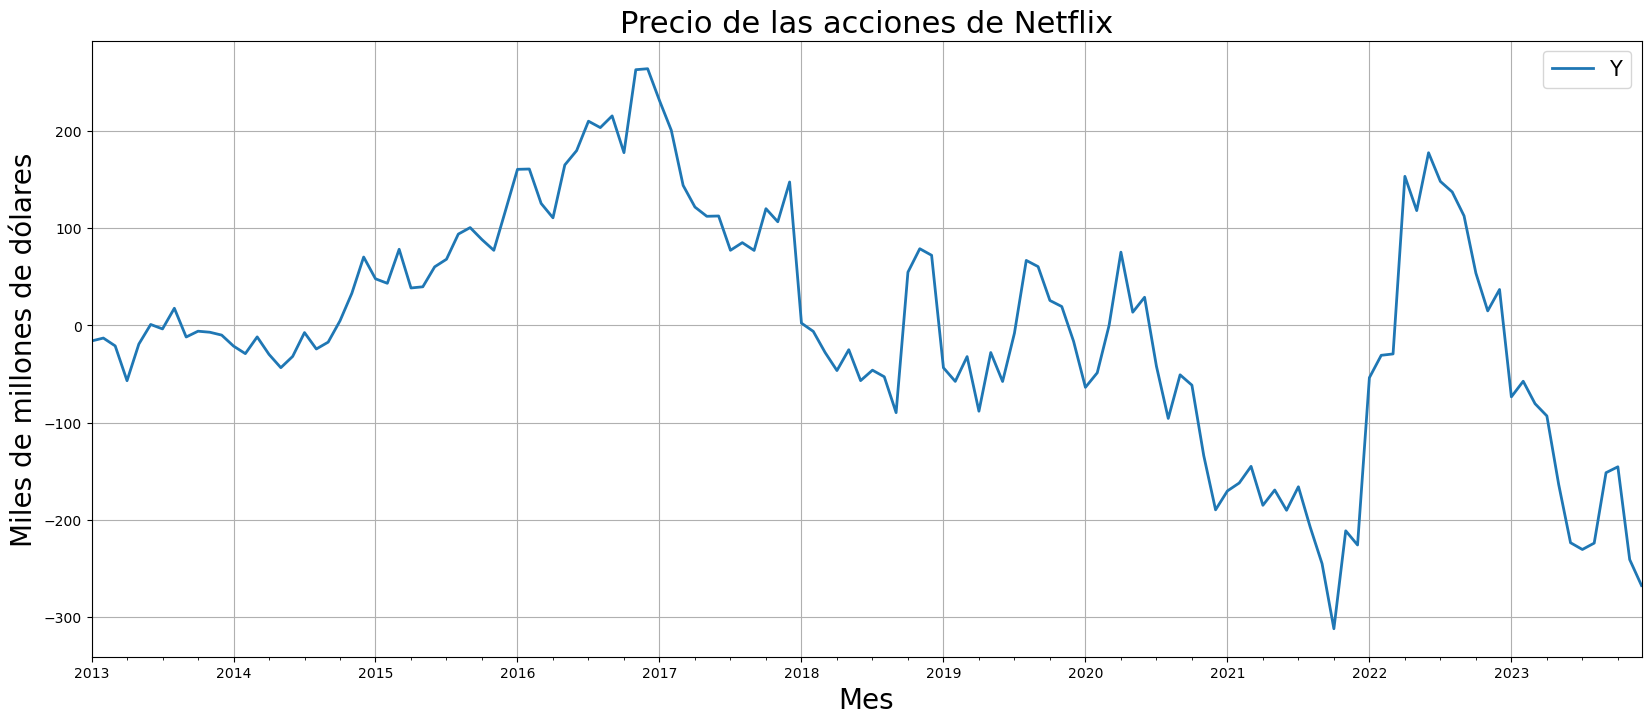

In [40]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
errors.plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Precio de las acciones de Netflix', fontsize=22)
ax.set_ylabel('Miles de millones de dólares', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [41]:
errors.mean()

6.890111377067638e-14

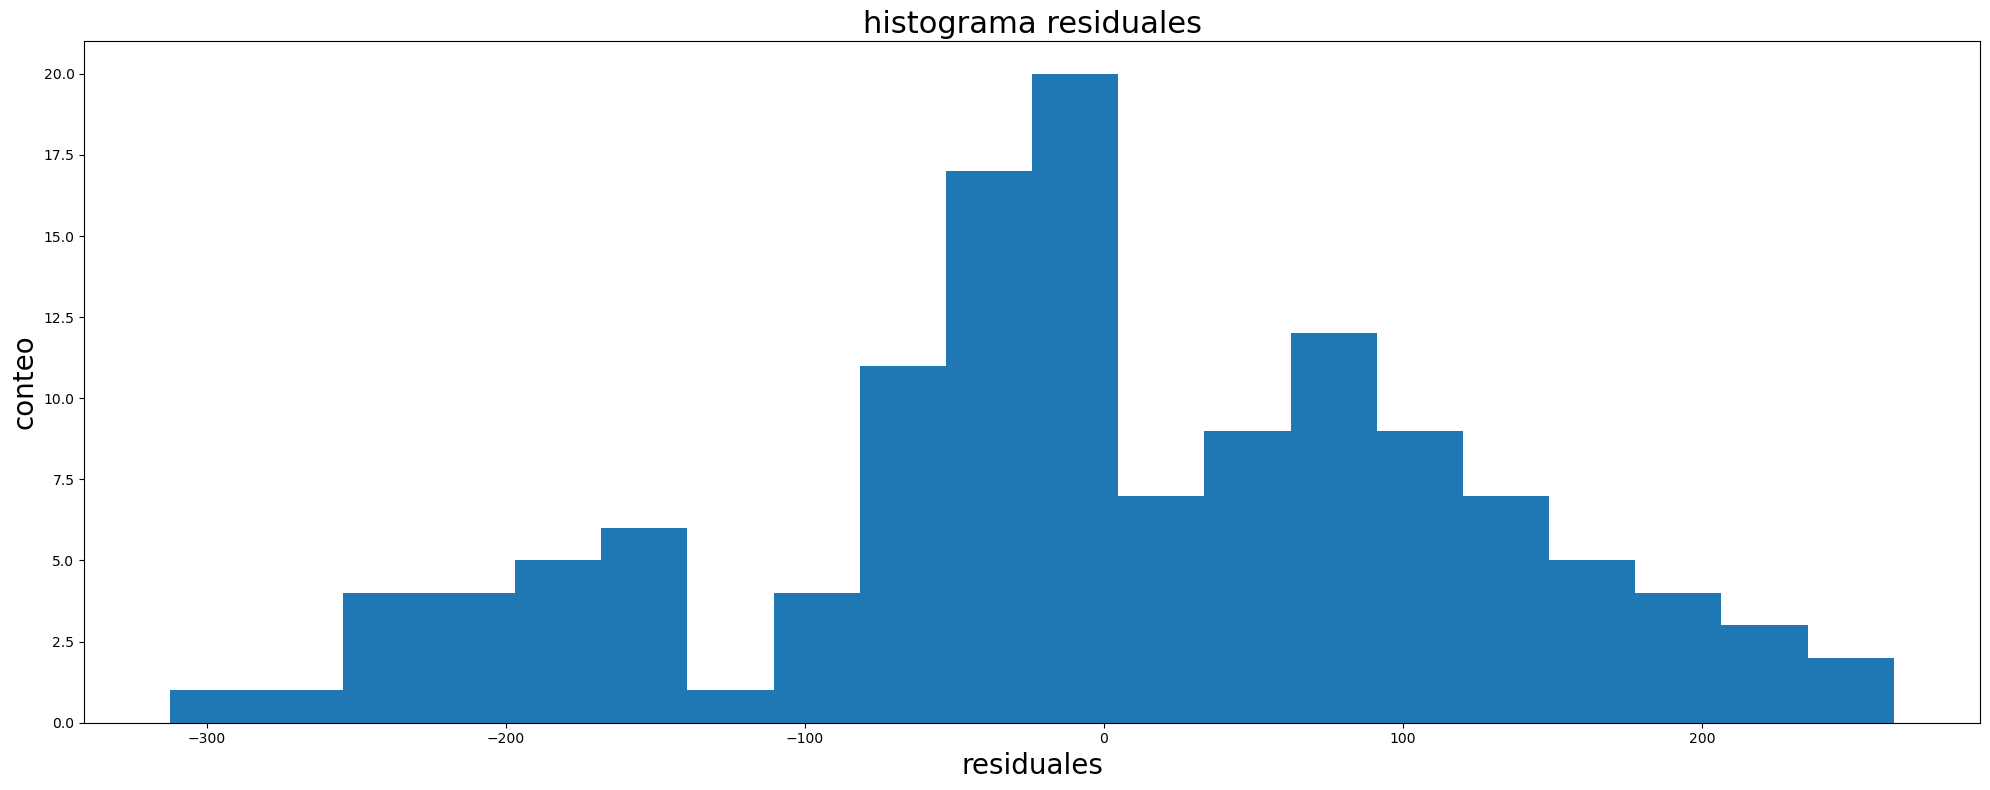

In [42]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(errors, bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Text(0, 0.5, 'ACF')

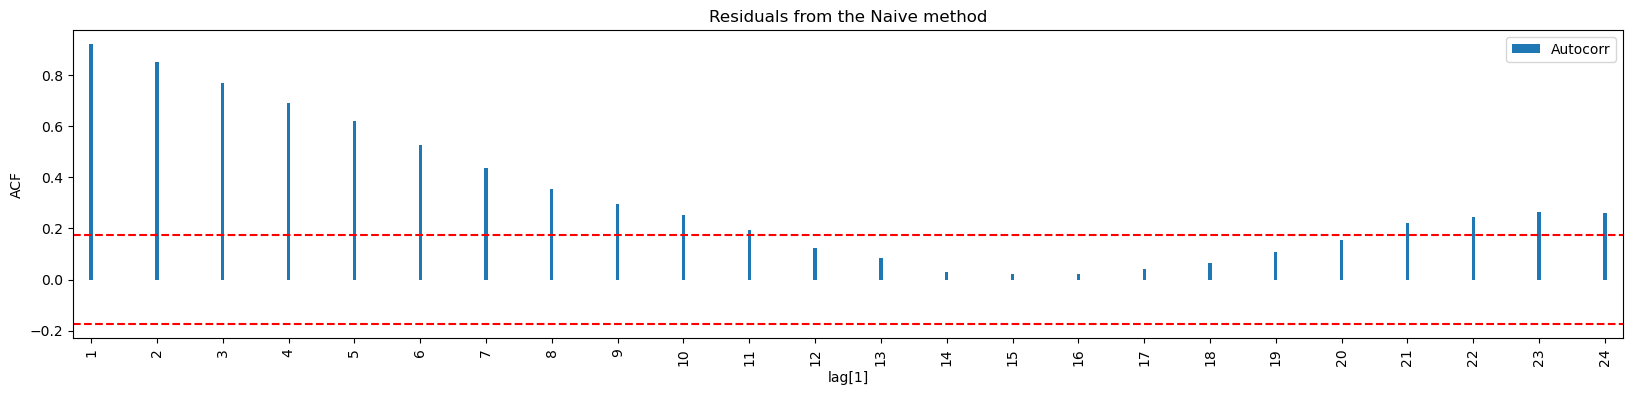

In [43]:
import math

ticker_data = errors
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(errors)
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the Naive method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")

In [44]:
import scipy as sp

In [45]:
sp.stats.boxcox(data['Y'])[0].shape

(132,)

In [46]:
data_copy = data.copy()
data_copy['Y'] = sp.stats.boxcox(data_copy['Y'])[0]

In [47]:
data_copy.head()

,Y,Close,August,December,February,January,July,June,March,May,November,October,September,2008_outlier,2020_outlier
Date,,,,,,,,,,,,,,,
2013-01-01,6.173244,12.6852,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-01,6.621323,12.7823,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-03-01,6.643916,12.3233,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-04-01,7.126909,12.1346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-05-01,7.300737,12.7957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [48]:
LinearRegression().fit(data_copy.drop(columns=['Y']),
                       data_copy['Y']).score(data_copy.drop(
                                        columns=['Y']),
                                        data_copy['Y'])

0.6375520817678795

In [49]:
predict = LinearRegression().fit(data_copy.drop(columns=['Y']),
                                data_copy['Y']).predict(data_copy.drop(
                                            columns=['Y']))

In [50]:
errors = predict - data_copy['Y']

In [51]:
from scipy.special import inv_boxcox

In [52]:
lambda_val = sp.stats.boxcox(data['Y'])[1]

In [53]:
inverted_predictions = inv_boxcox(predict, lambda_val)

In [54]:
inverted_predictions[:12]

array([36.70641829, 39.7490952 , 36.30192668, 26.68852928, 40.79851046,
       45.51024771, 47.0870433 , 58.58230262, 47.118596  , 49.27521958,
       51.172197  , 49.76712883])

In [55]:
errors = inverted_predictions - data['Y']

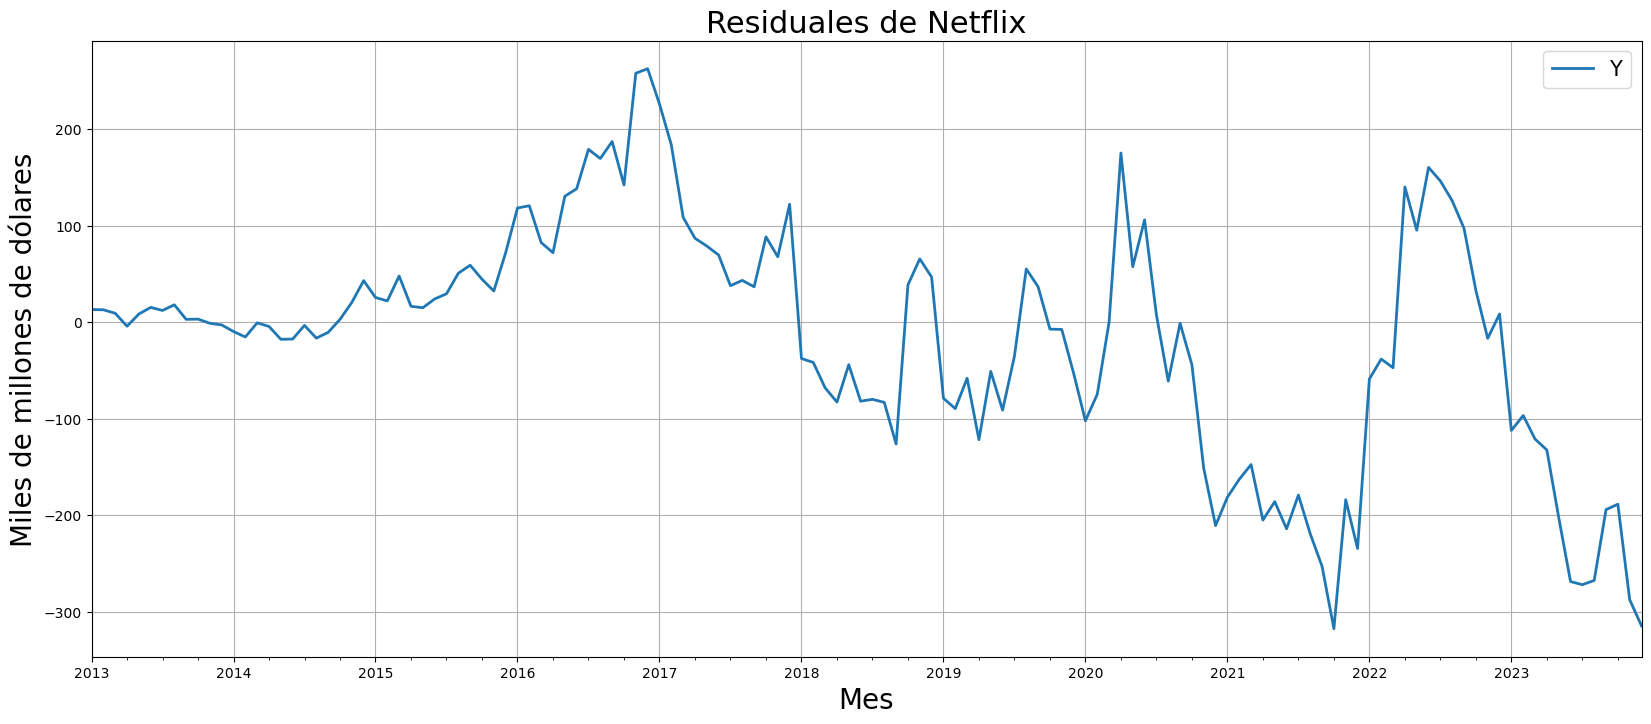

In [57]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
errors.plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales de Netflix', fontsize=22)
ax.set_ylabel('Miles de millones de dólares', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [58]:
errors.mean()

-15.749525923091934

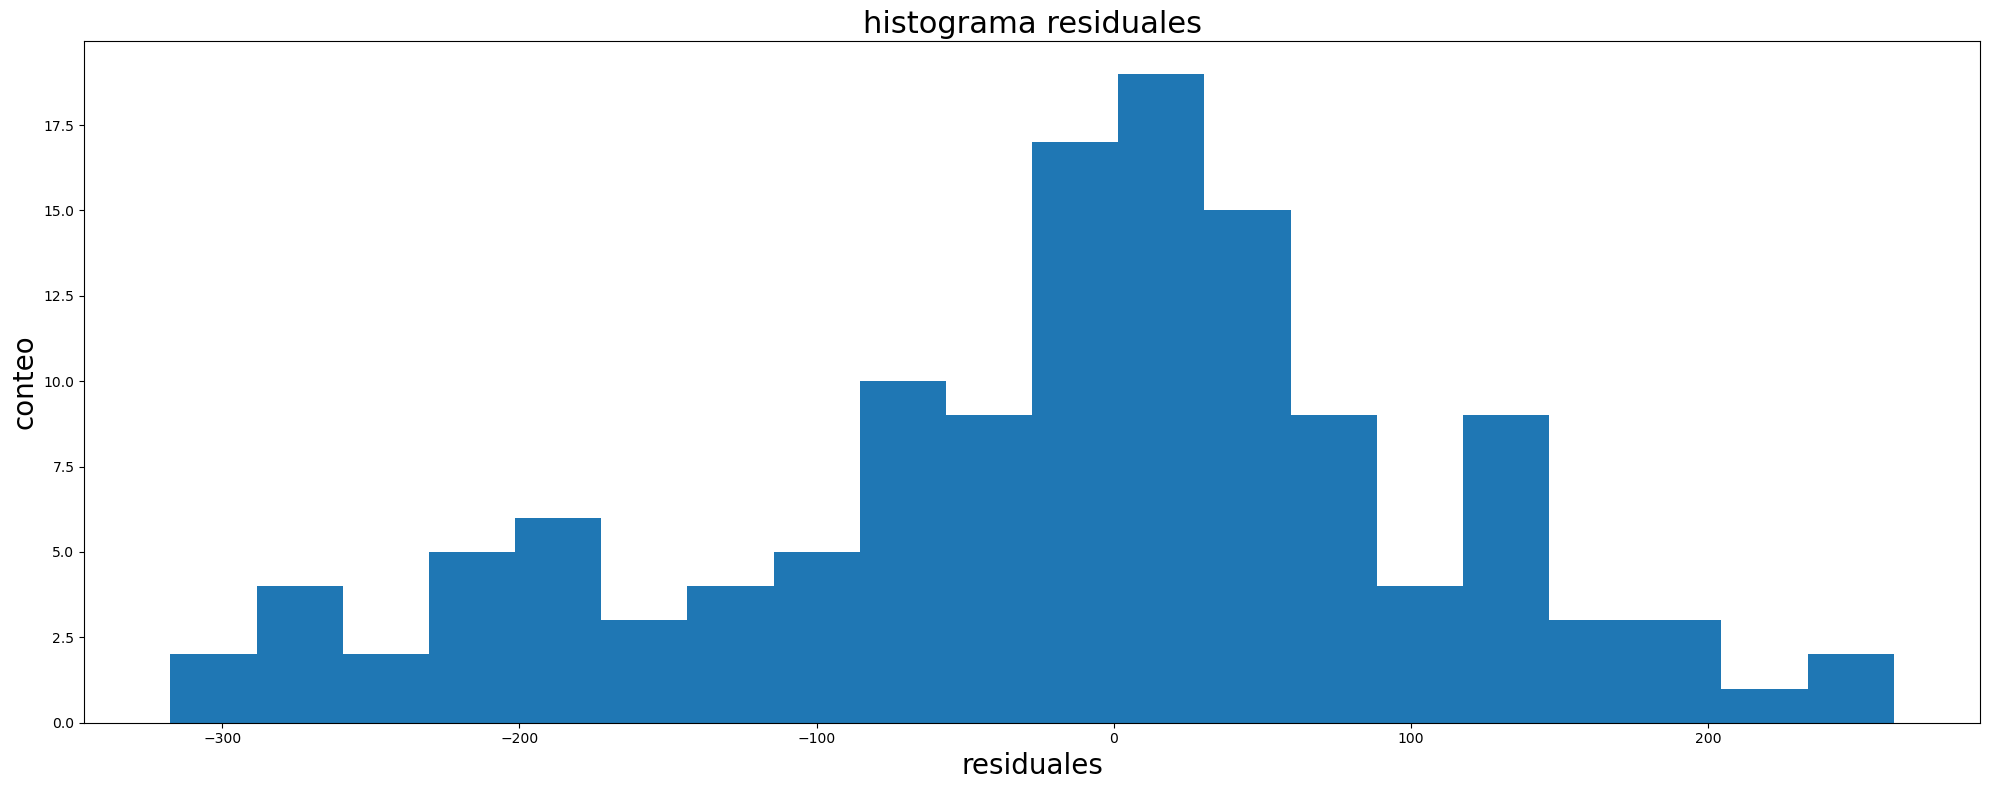

In [59]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(errors, bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Text(0, 0.5, 'ACF')

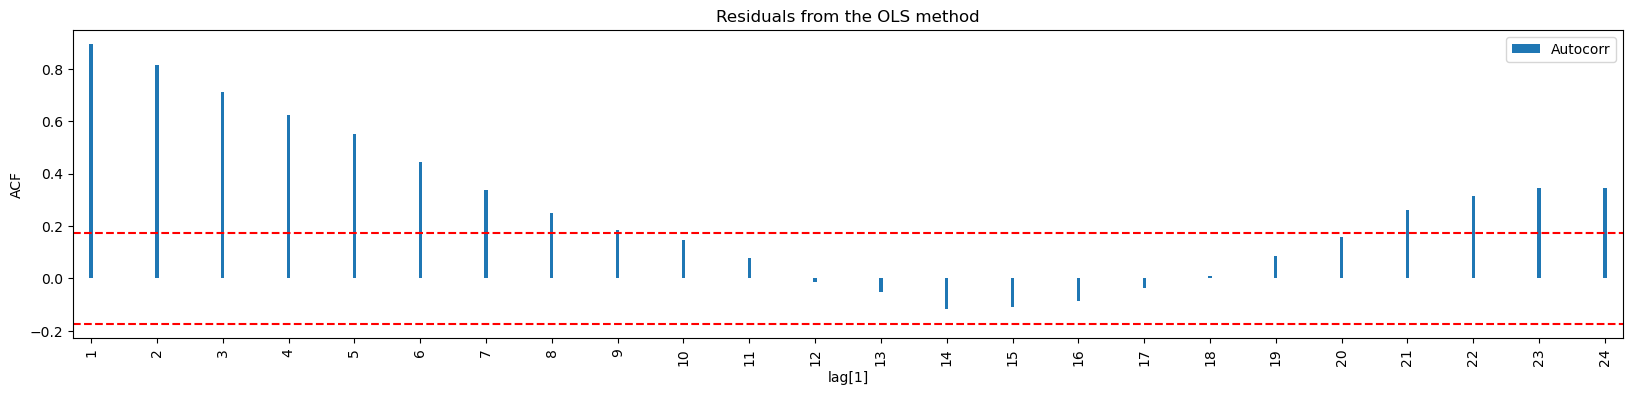

In [60]:
import math

ticker_data = errors
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(errors)
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the OLS method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")

In [61]:
from statsmodels.tsa.deterministic import Fourier

In [62]:
fourier_gen = Fourier(12, order=4)
fourier_data = fourier_gen.in_sample(data.index)

<Axes: xlabel='Date'>

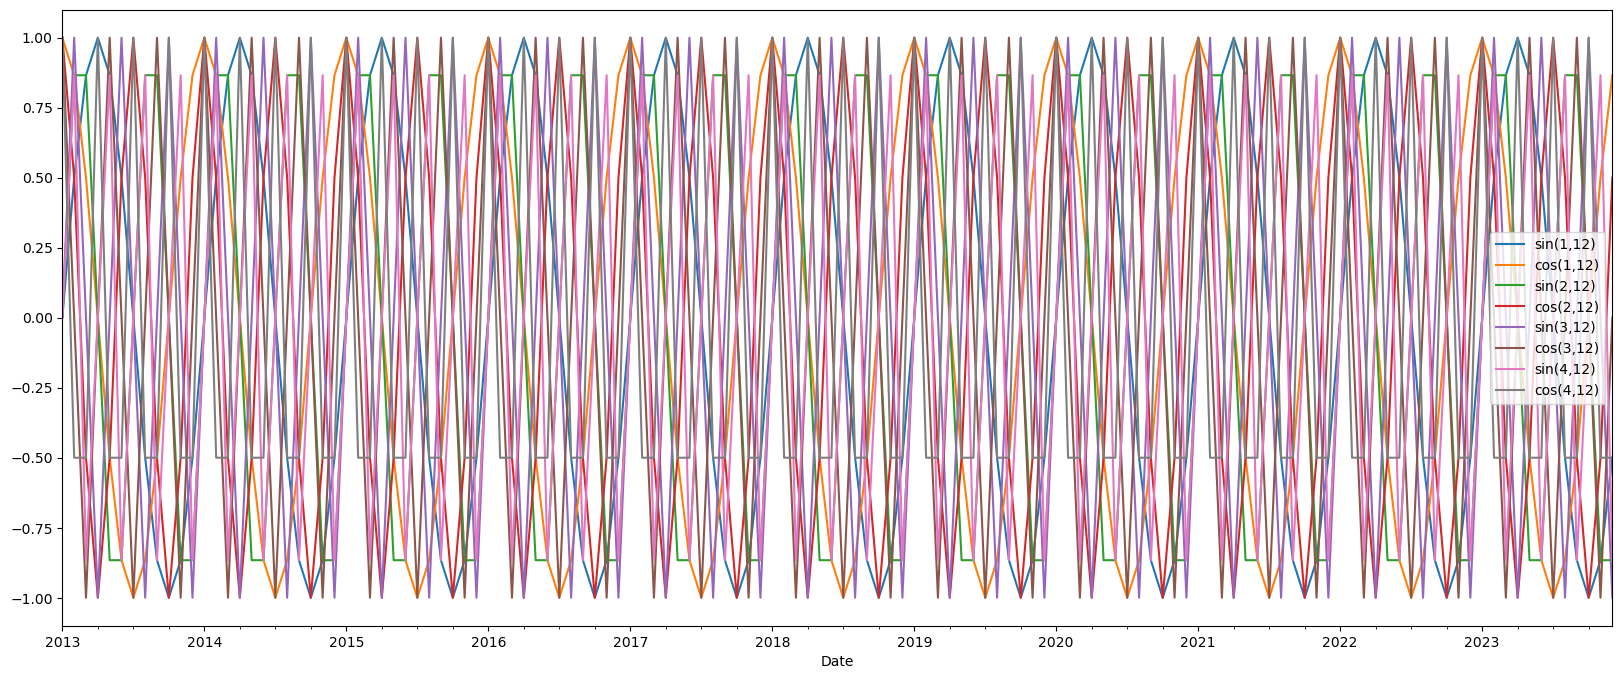

In [63]:
fourier_data.plot(figsize=(20, 8))

<Axes: xlabel='Date'>

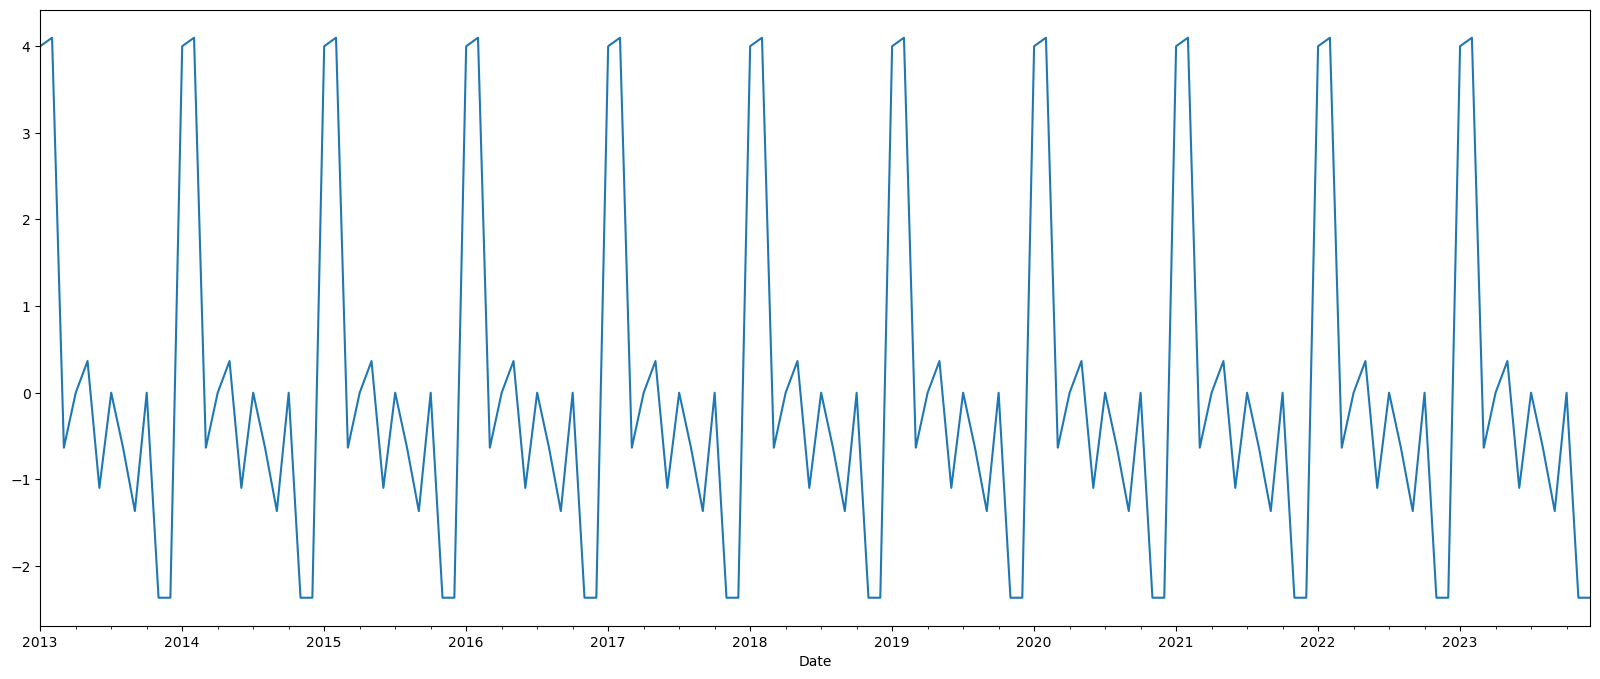

In [64]:
fourier_data.sum(1).plot(figsize=(20, 8))

In [65]:
data = data.join(fourier_data)

In [66]:
data.columns

Index(['Y', 'Close', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September',
       '2008_outlier', '2020_outlier', 'sin(1,12)', 'cos(1,12)', 'sin(2,12)',
       'cos(2,12)', 'sin(3,12)', 'cos(3,12)', 'sin(4,12)', 'cos(4,12)'],
      dtype='object')

In [67]:
LinearRegression().fit(data.drop(columns=['Y']),
                       data['Y']).score(data.drop(
                                        columns=['Y']),
                                        data['Y'])

0.555523561356214

In [68]:
predict = LinearRegression().fit(data.drop(columns=['Y']),
                                data['Y']).predict(data.drop(
                                            columns=['Y']))

In [69]:
errors = predict - data['Y']

In [70]:
predict = pd.Series(predict, index=errors.index)

In [71]:
training_mask = data.index > '2022-01-01'
test = data[training_mask]
train = data[~training_mask]

In [72]:
test.shape, train.shape

((23, 23), (109, 23))

In [73]:
errors.sum()

-39.385704040527344

In [74]:
errors.mean()

-0.2983765457615708

In [75]:
mae = np.mean(abs(errors))
mae


93.03546350652522

In [76]:
rmse = np.sqrt(np.mean(errors**2))
rmse

115.33998934659368

In [77]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(data['Y'], predict)
mape

0.5619837565746264

<Axes: xlabel='Date'>

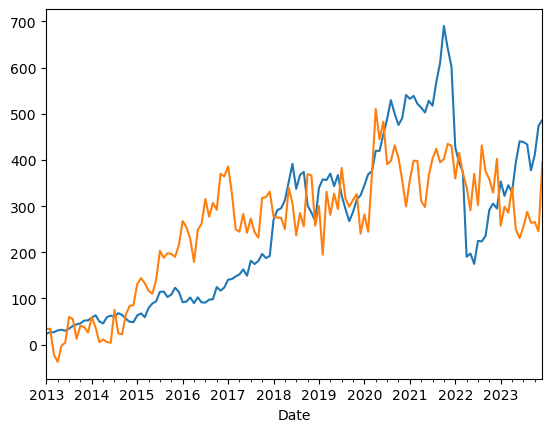

In [78]:
data['Y'].plot()
predict.plot()

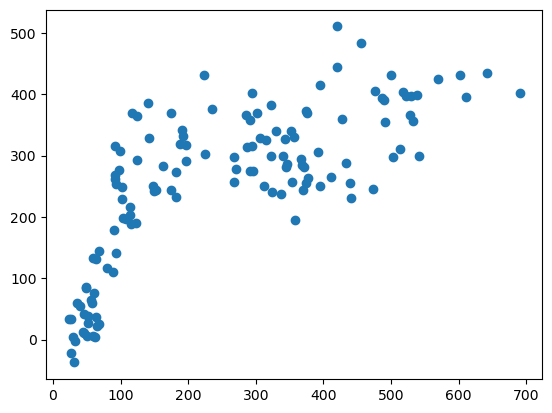

In [79]:
plt.scatter(data['Y'], predict)

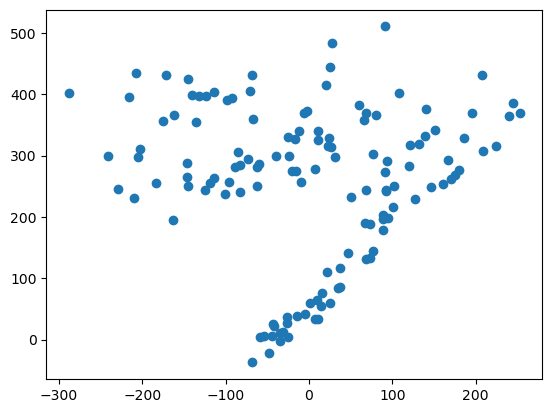

In [80]:
plt.scatter(x=errors, y=predict)

In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [82]:
Ridge(alpha=1.0).fit(data.drop(columns=['Y']), data['Y']).score(data.drop(columns=['Y']), data['Y'])

0.5161528751598145

In [83]:
predict = Ridge(alpha=1.0).fit(data.drop(columns=['Y']), data['Y']).predict(data.drop(columns=['Y']))

In [84]:
Ridge(alpha=1.0).fit(data.drop(columns=['Y']), data['Y']).feature_names_in_

array(['Close', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September',
       '2008_outlier', '2020_outlier', 'sin(1,12)', 'cos(1,12)',
       'sin(2,12)', 'cos(2,12)', 'sin(3,12)', 'cos(3,12)', 'sin(4,12)',
       'cos(4,12)'], dtype=object)

In [85]:
Ridge(alpha=1.0).fit(data.drop(columns=['Y']), data['Y']).coef_

array([ 44.4112747 ,   2.89931408,   4.01250759,  -2.75157223,
        -1.70151447,   2.46589393,  -2.53316647,   3.3070063 ,
         2.92953221,  -2.38079979,   5.33711693,  -3.54996341,
         0.        , -68.44228525,  -8.93255941,  -2.61918061,
        -1.83882205,   4.12227104,   1.17491123,  -5.71404611,
        -0.46757554,  -2.89928742])

In [86]:
from sklearn.linear_model import RidgeCV

In [87]:
ridge_cv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100]).fit(data.drop(columns=['Y']), data['Y'])
ridge_cv.score(data.drop(columns=['Y']), data['Y'])

0.5076965408025926

In [88]:
ridge_cv.alpha_

100.0

In [89]:
ridge_cv.best_score_

-15975.005010514238

In [90]:
from sklearn.linear_model import Lasso

In [91]:
Lasso(alpha=0.1).fit(data.drop(columns=['Y']), data['Y']).score(data.drop(columns=['Y']), data['Y'])

0.5174319582102054

In [92]:
Lasso(alpha=1).fit(data.drop(columns=['Y']), data['Y']).feature_names_in_

array(['Close', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September',
       '2008_outlier', '2020_outlier', 'sin(1,12)', 'cos(1,12)',
       'sin(2,12)', 'cos(2,12)', 'sin(3,12)', 'cos(3,12)', 'sin(4,12)',
       'cos(4,12)'], dtype=object)

In [93]:
Lasso(alpha=1).fit(data.drop(columns=['Y']), data['Y']).intercept_

-535.8001924890655

In [94]:
Lasso(alpha=1).fit(data.drop(columns=['Y']), data['Y']).coef_

array([43.95006773,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -8.20218509,
       -1.58583093, -1.09902203,  2.01454745,  0.        , -3.71199134,
        0.        , -0.        ])

In [95]:
from sklearn.linear_model import LassoCV

In [96]:
lasso_cv = LassoCV(cv=5, random_state=0).fit(data.drop(columns=['Y']), data['Y'])
lasso_cv.score(data.drop(columns=['Y']), data['Y'])

0.5091725264525357

In [97]:
lasso_cv.alpha_

9.172234415072358

In [98]:
lasso_cv.coef_

array([42.98912458,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ])